# Import necessary dependencies

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
from scipy.linalg import eigh

import math 
%matplotlib inline

In [2]:
# setup
charar = np.array(['rkl1','rkl2','rkl3','rkr1', 'rkr2', 'rkr3', 'rhl1','rhl2','rhl3',  'rhr1','rhr2','rhr3'])
charar2 = np.array(['rkl1','rkl2','rkl3','rkr1', 'rkr2', 'rkr3', 'rhl1','rhl2','rhl3',  'rhr1','rhr2','rhr3'])
charar = np.repeat(charar, 12, axis=0)
charar2 = np.repeat(charar2, 12, axis=0)
headers = np.core.defchararray.add(charar, np.transpose(charar2))


# Helper functions

In [3]:
def reshape_back_to_matrices(dataset, dim=2):
    """ reshape pandas d.frame into matrices"""
    m,n = dataset.shape
    d = int(np.sqrt(n-dim))
    matrices=np.zeros([m,d,d ])
    persons=np.zeros(m)
    Y = np.zeros(m)
    for i in range(0,m):
        matrices[i,:,:] = np.reshape(dataset.iloc[i,dim:], (d, d))
        persons[i] =dataset.iloc[i,1]
        Y[i] = dataset.iloc[i,0]
    return matrices, persons, Y

def get_single_class(dataset, pathology_key=2):
    """ returns the PD frame for a given disease, if no args -normal"""
    path_idx = np.where(cov_mat["pathology"]==pathology_key)
    r1=np.min(path_idx)
    r2=np.max(path_idx)
    sub_PD = dataset.iloc[r1:r2 ,2:]
    return sub_PD

# Load  dataset

In [4]:
headers = headers.ravel()
headers = np.concatenate((np.array(['pathology', 'person']), headers), axis=0)
cov_mat = pd.read_csv('matrice_cov.csv', sep = ',',  header=None, names=headers)
m,n = cov_mat.shape
cov_mat.head()


,pathology,person,rkl1rkl1,rkl1rkl1.1,rkl1rkl1.2,rkl1rkl1.3,rkl1rkl1.4,rkl1rkl1.5,rkl1rkl1.6,rkl1rkl1.7,...,rhr3rhr3.2,rhr3rhr3.3,rhr3rhr3.4,rhr3rhr3.5,rhr3rhr3.6,rhr3rhr3.7,rhr3rhr3.8,rhr3rhr3.9,rhr3rhr3.10,rhr3rhr3.11
0,1,1,205.75,2.8668,-57.606,31.3160,12.5730,7.8973,47.636,37.701,...,4.9126,3.09880,1.15620,1.6122,-31.436,-2.18570,-7.3491,29.547,-7.1609,4.4260
1,1,1,203.17,-7.7711,-34.958,19.9230,2.8556,36.5580,37.240,34.164,...,8.0108,0.85872,-0.22068,8.5058,-27.321,-0.95937,-4.8754,27.517,-4.8884,5.4577
2,1,1,213.96,11.4590,-38.641,-7.3226,8.9014,10.9930,6.917,33.325,...,8.5207,-2.61970,-2.35130,13.6750,-29.665,-3.24490,-4.2196,37.023,-2.9014,5.3454
3,1,1,206.14,1.1175,-64.799,27.5790,12.5630,7.6781,34.669,45.452,...,8.6354,2.55670,-0.48222,10.3620,-40.772,-4.34390,-6.5372,41.282,-8.1390,8.1684
4,1,1,211.66,8.2046,-38.744,28.9880,7.5080,6.0212,-17.105,46.982,...,5.0300,8.23960,0.75952,8.9275,-35.773,-1.42710,-7.2087,36.988,-11.6310,7.7991


In [ ]:
# Reshape to matrices and visualize the one to check if it is symmetric

In [5]:
data_as_mat,_,_ = reshape_back_to_matrices(cov_mat)

C:\Users\margo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


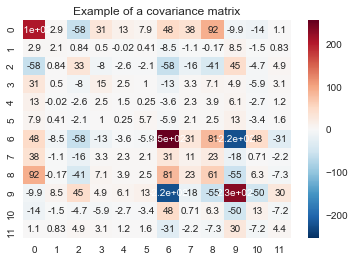

In [6]:
ax = sns.heatmap(data_as_mat[0,:,:],annot=True)
ax.set_title("Example of a covariance matrix")

# Understand dataset features and values

Each row of the dataset is a covariance matrix, reshaped to be loaded here.
Covariance matrices are  composed of 4 angles (Left and right knee and hip), each has 3 dimensions, then the final matrix is 12x12.
Rows of the dataset - gait cycles.
First column = Pathology - 1,2,3 - knee rigidity, normal gait, and limping gait.
Second column = Person - 22 subjects

# Exploratory Data Analysis and Visualizations

## Visualizing one dimension

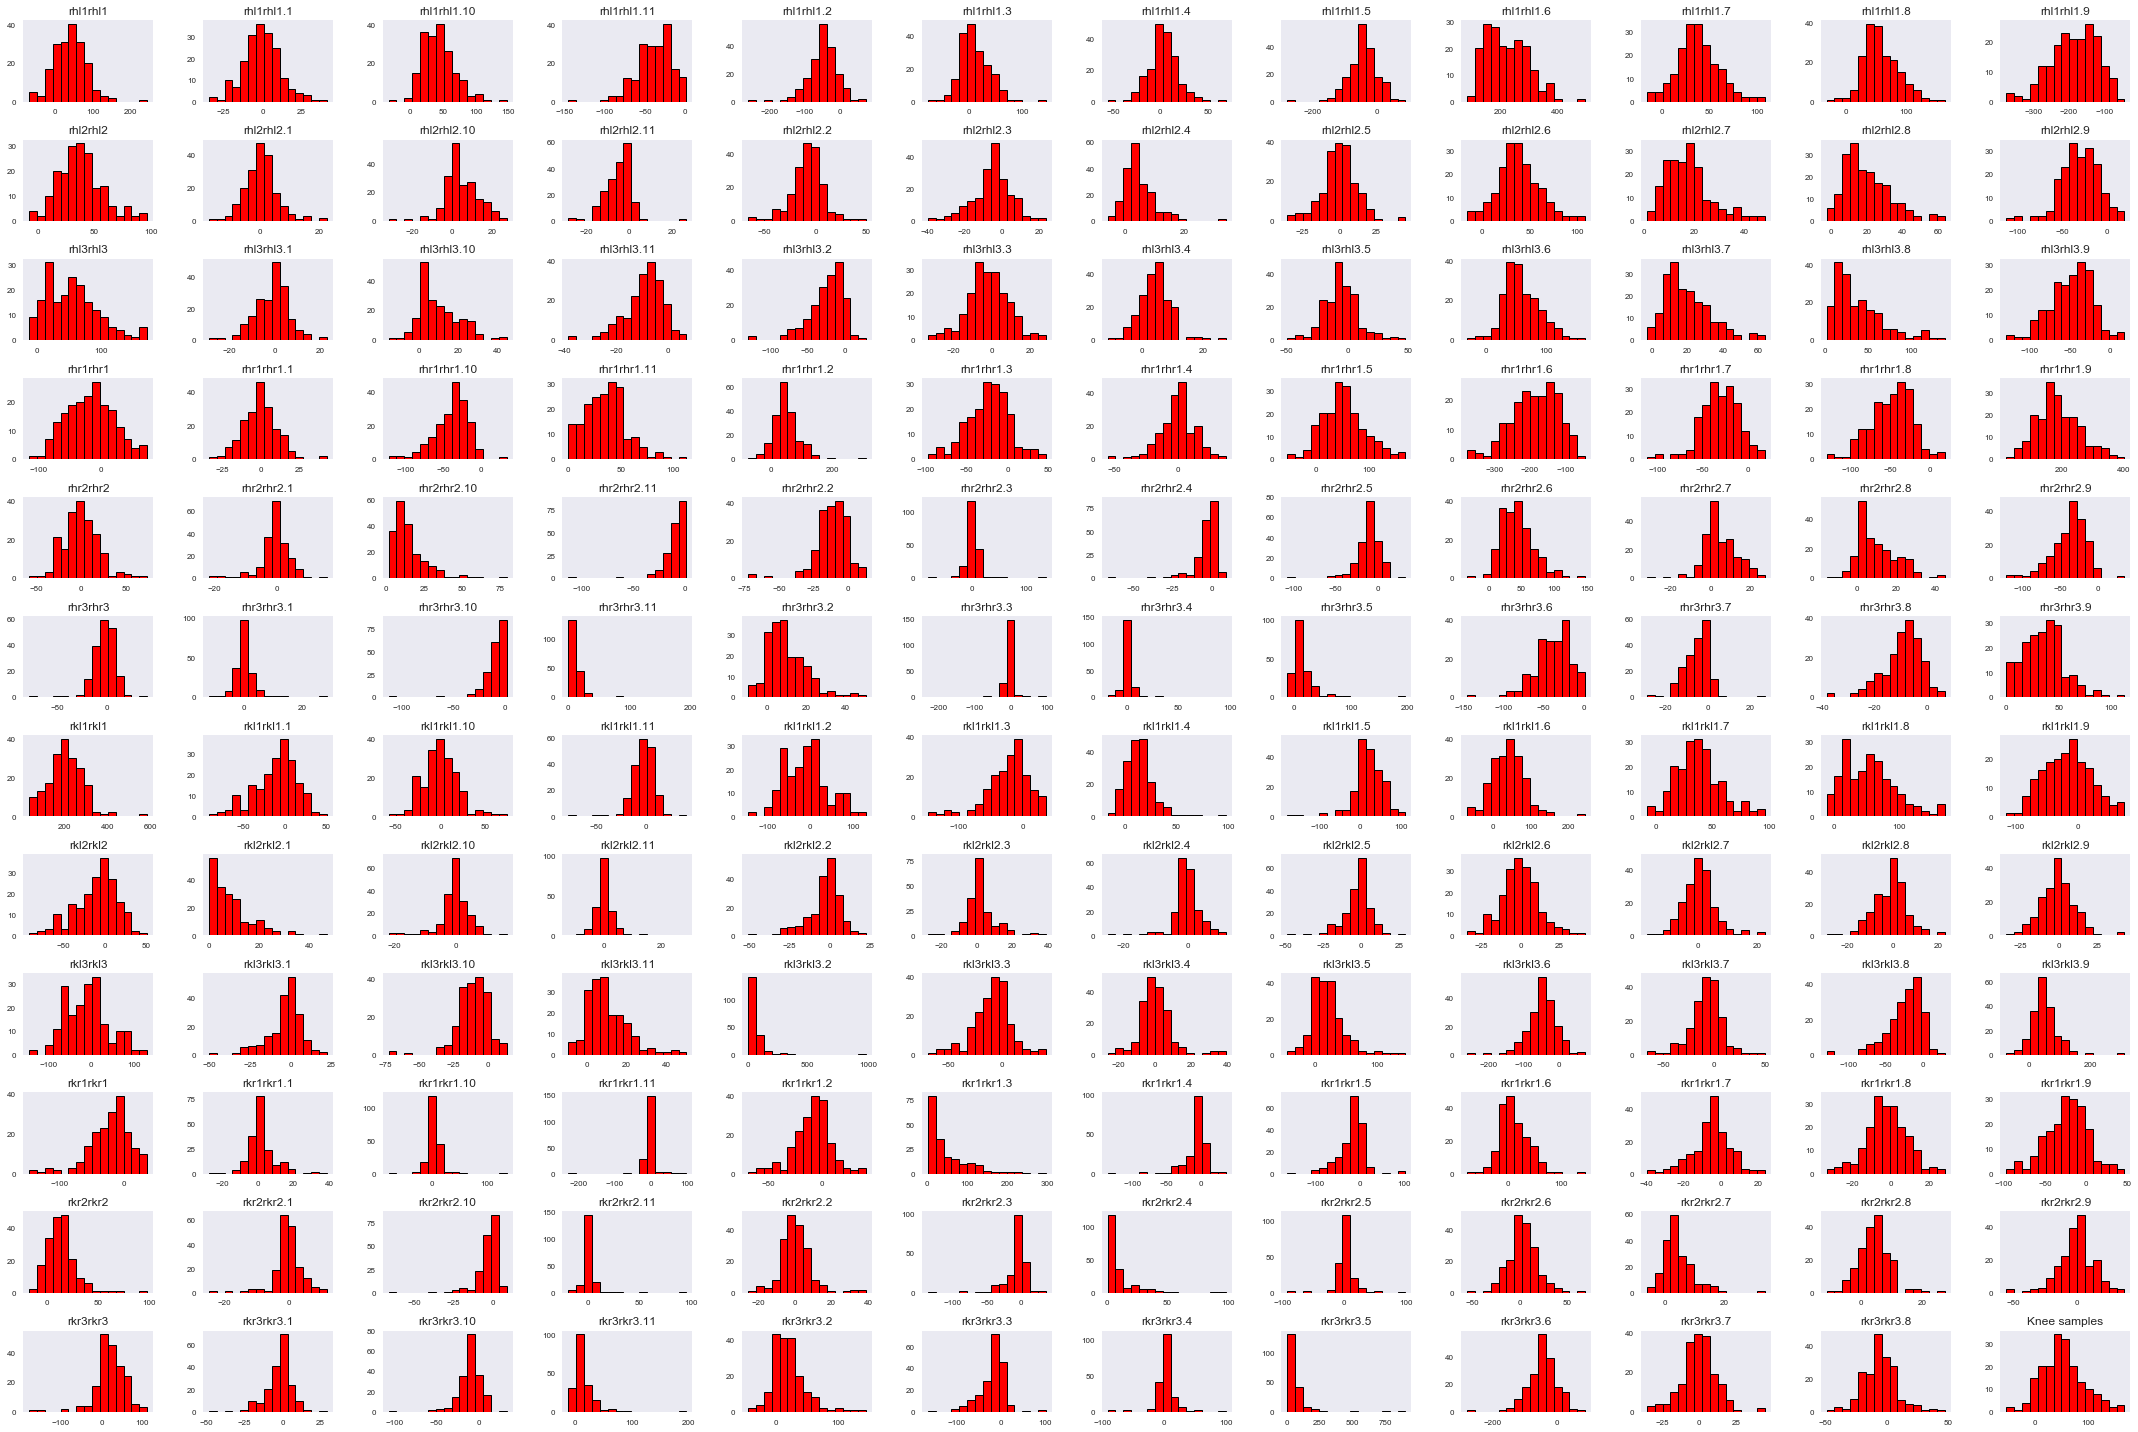

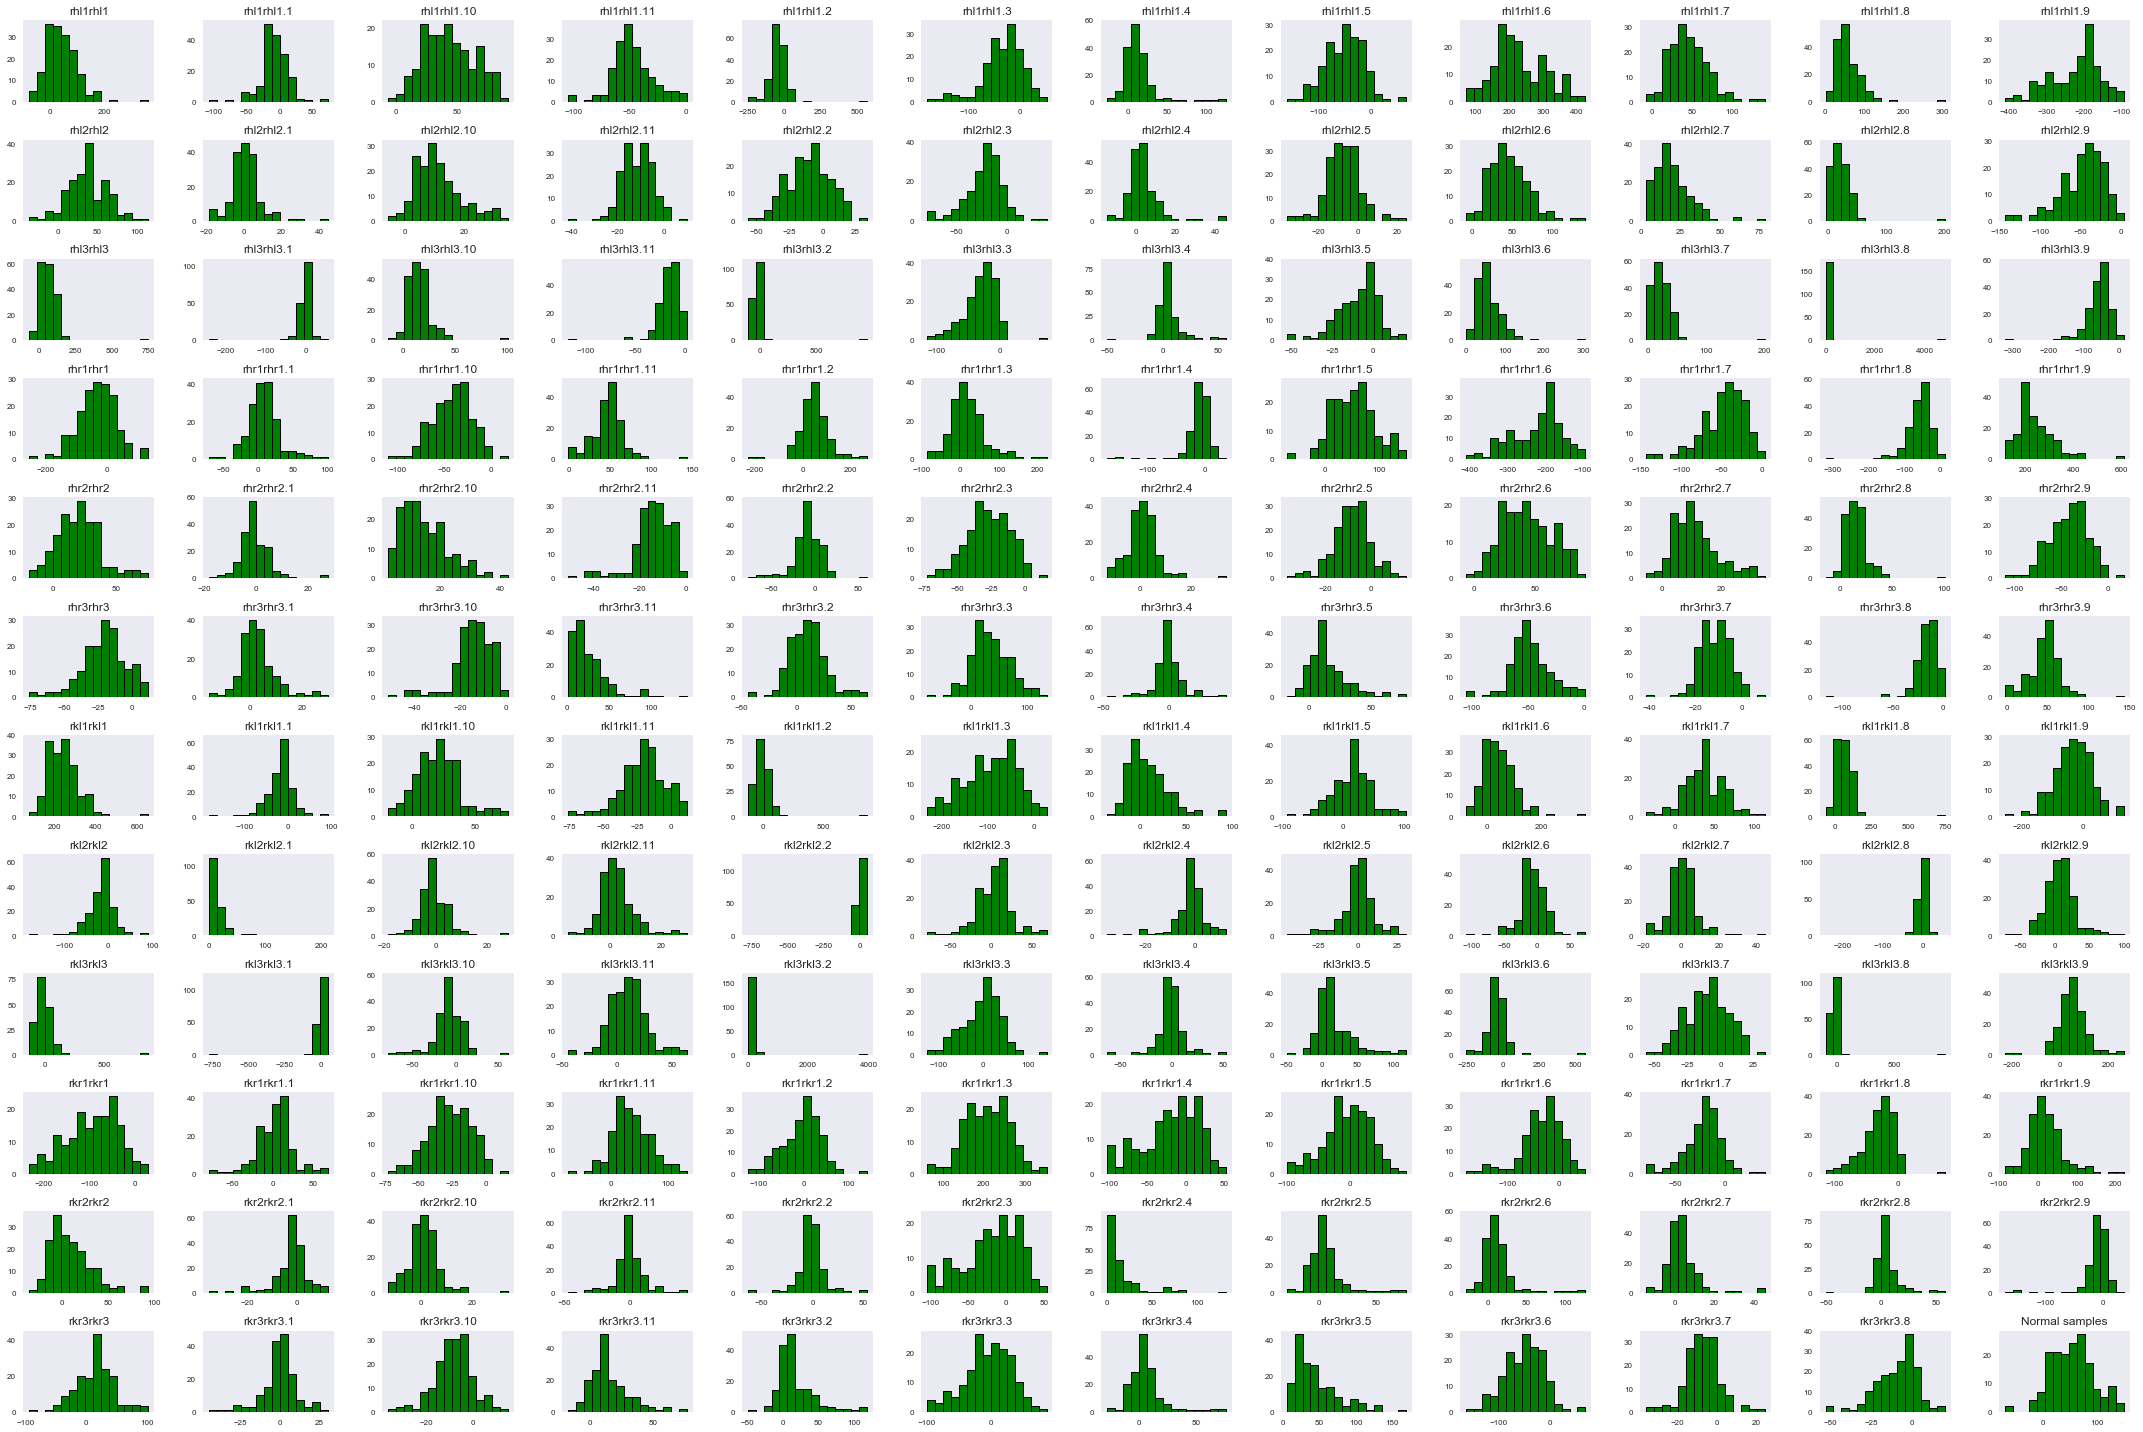

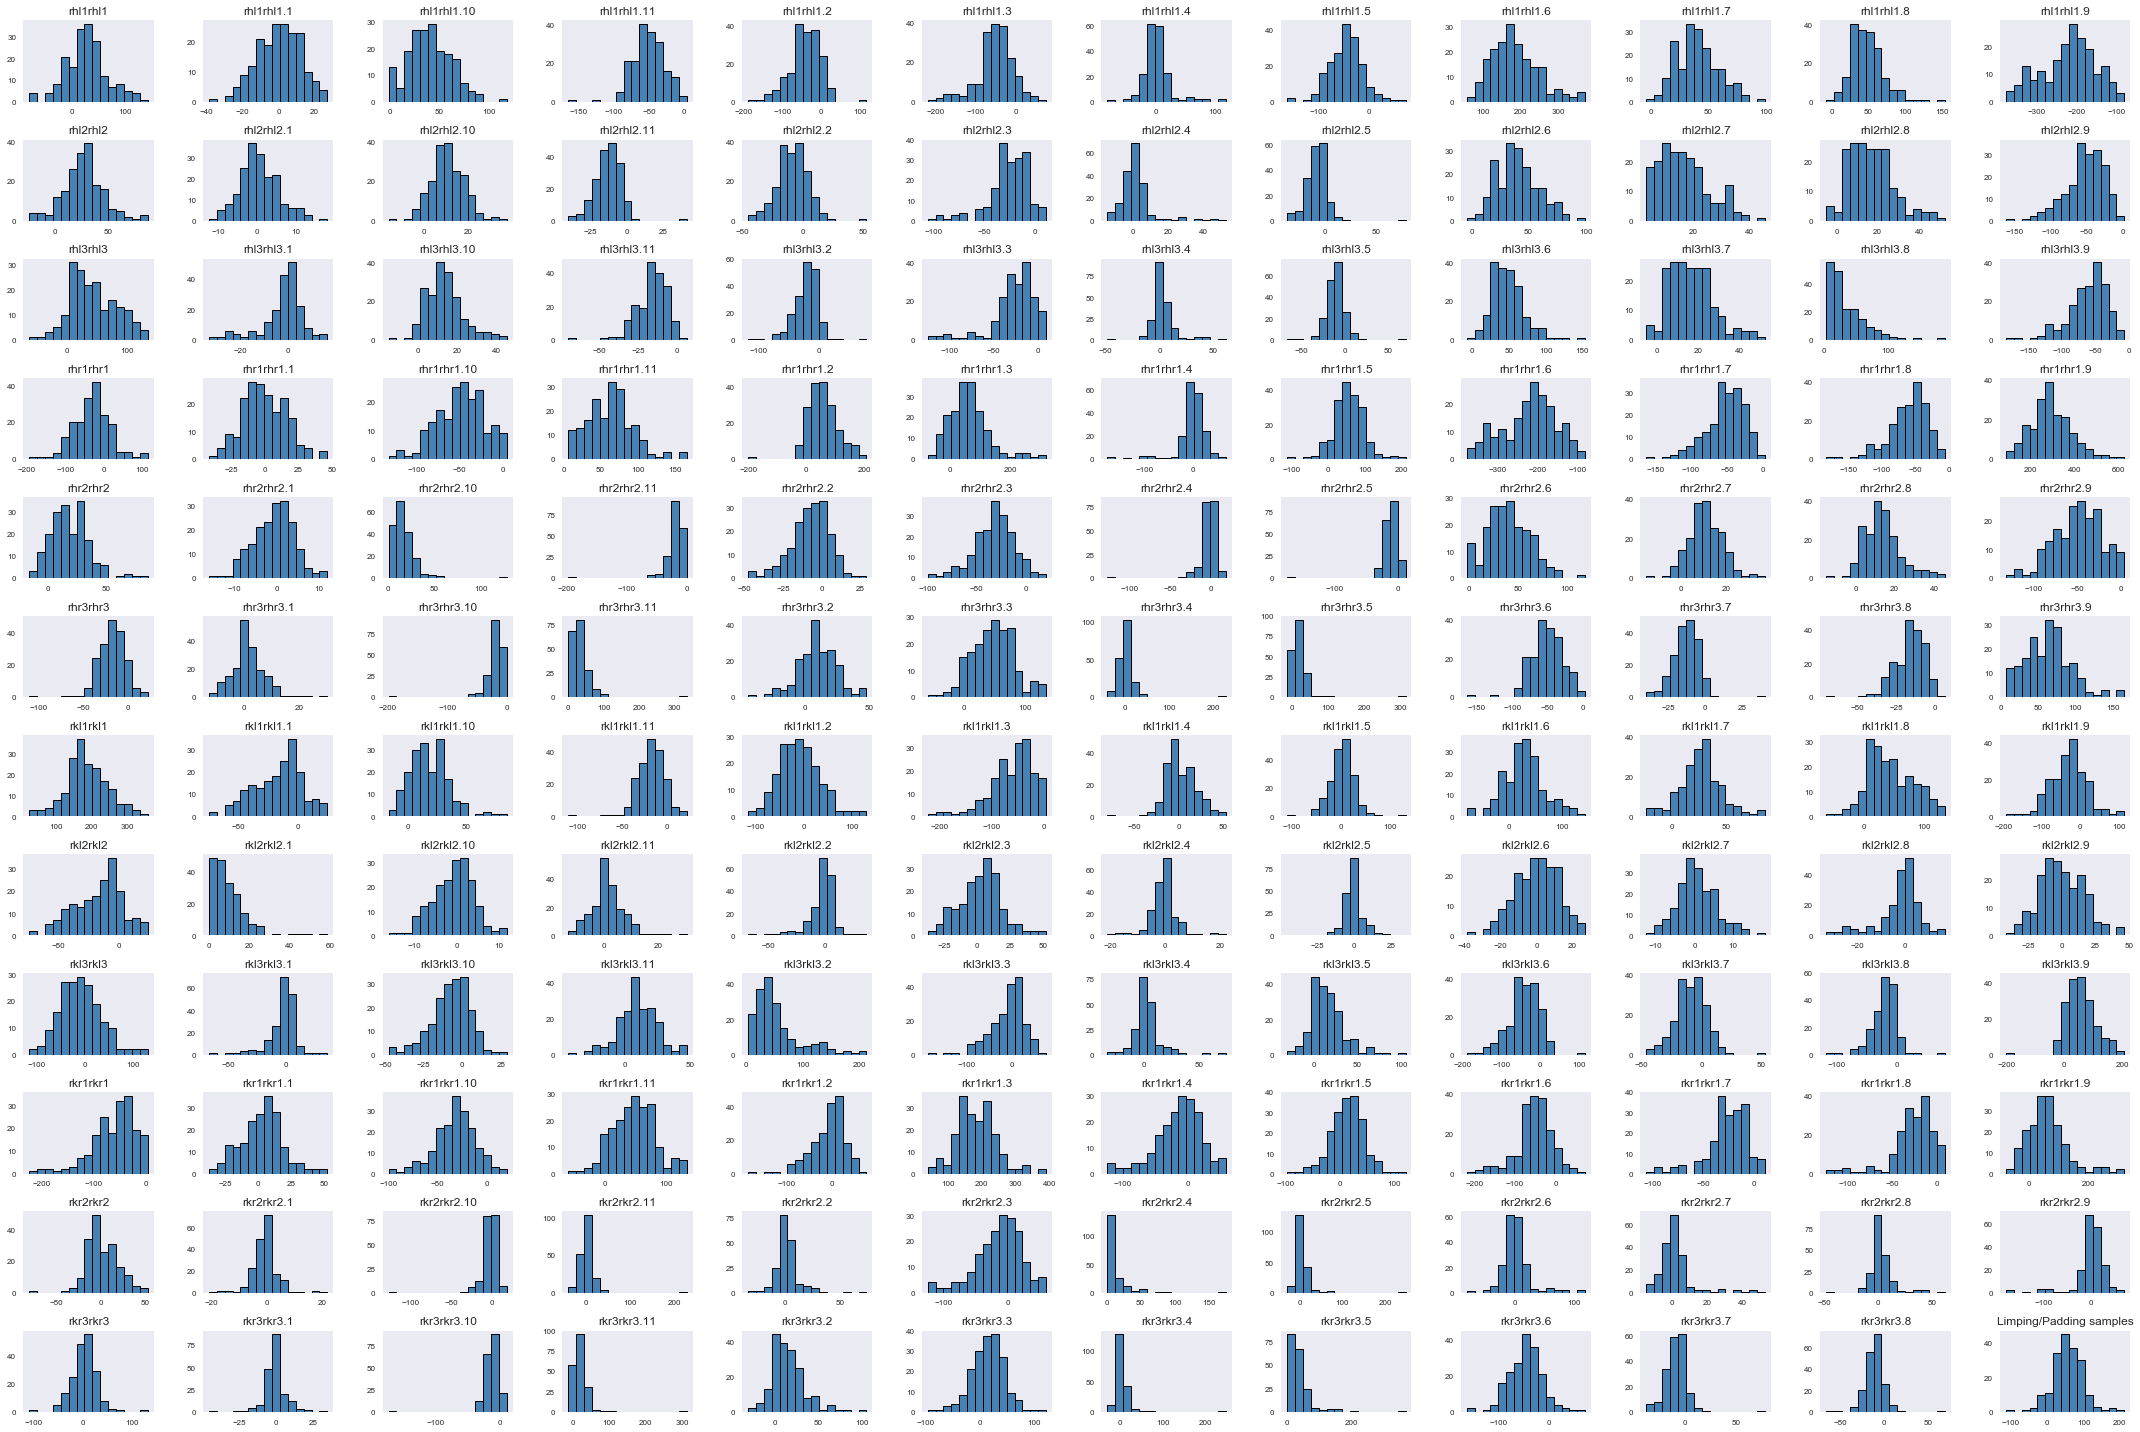

In [7]:
# get sub-classes
knee = get_single_class(cov_mat, 1)
normal = get_single_class(cov_mat, 2)
padding = get_single_class(cov_mat, 3)

knee.hist(bins=15, color='red', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 5, 5))
plt.title("Knee samples")  

normal.hist(bins=15, color='green', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 5, 5))
plt.title("Normal samples")

padding.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 5, 5))
plt.title("Limping/Padding samples")

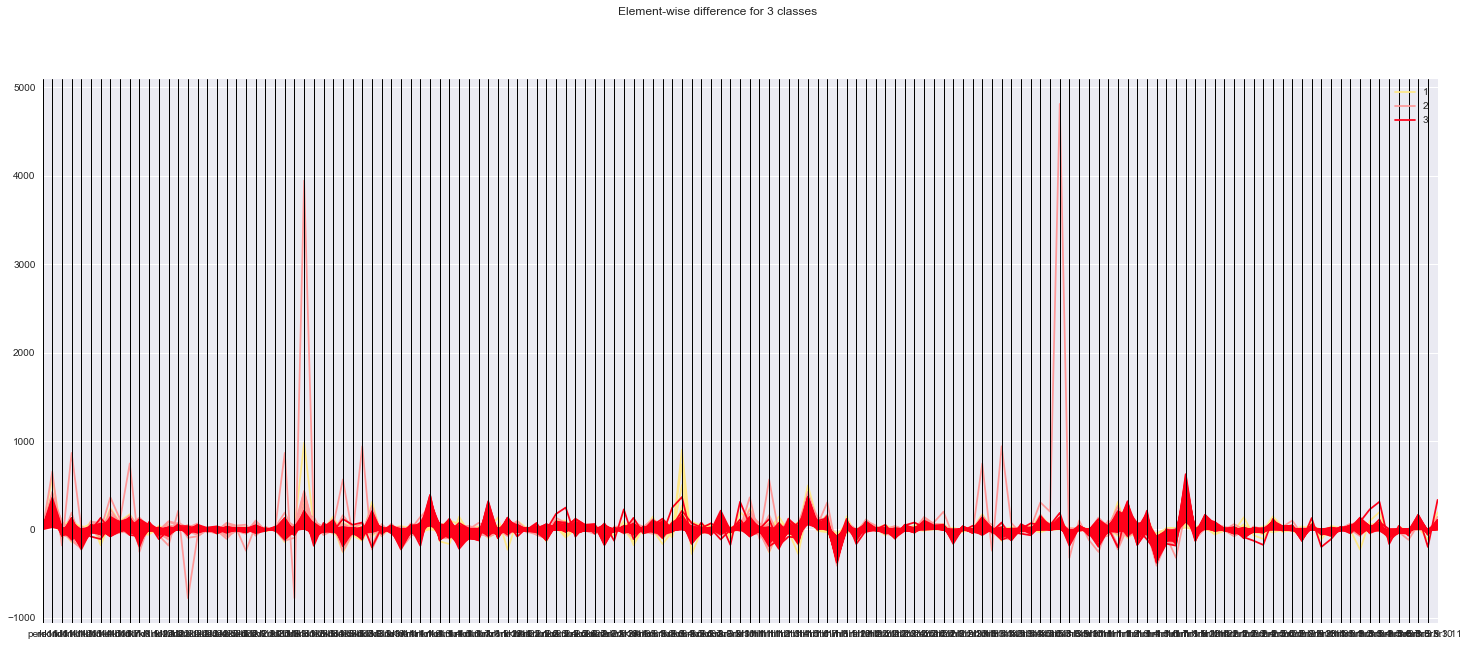

In [8]:
from pandas.plotting import parallel_coordinates
fig, ax = plt.subplots(figsize=(25, 10))
ax.grid(False)
fig.suptitle("Element-wise difference for 3 classes")
pc = parallel_coordinates(cov_mat, 'pathology', color=('#FFE888', '#FF9999', '#FF0019'))

# Experimenting with different distances

In [31]:
def distance_riemann(A,B):
    # eig(A,B) returns a column vector containing the generalized eigenvalues of square matrices A and B.
    eigvals, eigvecs = eigh(A, B, eigvals_only=False)
    a =  math.sqrt(np.sum (np.exp (np.log(eigvals) ) ) ) # With one argument, return the natural logarithm of x (to base e).
    return a
def distance_euclidean(A,B):
    a = np.sum(np.sum(np.linalg.norm(A-B))) / np.size(A)
    return a

In [32]:
# small  test
print("Riemmanian  distance is equal to: ",format(distance_riemann(data_as_mat[0,:,:],data_as_mat[1,:,:])))
print("Euclidean  distance is equal to: ",format(distance_euclidean(data_as_mat[0,:,:],data_as_mat[1,:,:])))

Riemmanian  distance is equal to:  8.915438561578831
Euclidean  distance is equal to:  0.7517805027235037


Now I will just try to plot distance distributions for Riemmanian distances and Euclidean distances.

In [33]:
# some helper functions
def calculate_distance(arr1, arr2, dist='Euclidean'):
    (m1, _, _)= np.shape(arr1)
    (m2, _, _)= np.shape(arr2)
    pairwise_d = []
    for i in range(0,m1):
        for j in range(0,m2):
            if dist is not 'Euclidean':
                pairwise_d.append(distance_riemann(arr1[i,:,:], arr2[j,:,:]))
            else:
                 pairwise_d.append(distance_euclidean(arr1[i,:,:], arr2[j,:,:]))
    return pairwise_d
    

In [38]:
normal_mat,_,_ = reshape_back_to_matrices(normal, dim=0)
knee_mat,_, _ = reshape_back_to_matrices(knee, dim=0)
padding_mat, _, _ = reshape_back_to_matrices(padding, dim=0)

C:\Users\margo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [39]:
# TO DO: Create a data frame in order to later visualize my results

# euclidean
eucl_dist = [];
eucl_dist.append(calculate_distance(knee_mat, knee_mat))
eucl_dist.append(calculate_distance(normal_mat, normal_mat))
eucl_dist.append(calculate_distance(padding_mat, padding_mat))

eucl_dist.append(calculate_distance(knee_mat, normal_mat))
eucl_dist.append(calculate_distance(knee_mat, padding_mat))
eucl_dist.append(calculate_distance(normal_mat, padding_mat))

#d1 = np.pad(d1, (0,500000-np.size(d1)), mode='constant',constant_values=(np.nan,))
#d2 = np.pad(d2, (0,500000-np.size(d2)), mode='constant',constant_values=(np.nan,))
#d3 = np.pad(d3, (0,500000-np.size(d3)), mode='constant',constant_values=(np.nan,))
#d4 = np.pad(d4, (0,500000-np.size(d4)), mode='constant',constant_values=(np.nan,))
#d5 = np.pad(d5, (0,500000-np.size(d5)), mode='constant',constant_values=(np.nan,))
#d6 = np.pad(d6, (0,500000-np.size(d6)), mode='constant',constant_values=(np.nan,))

#data = [d1,d2,d3,d4,d5,d6]

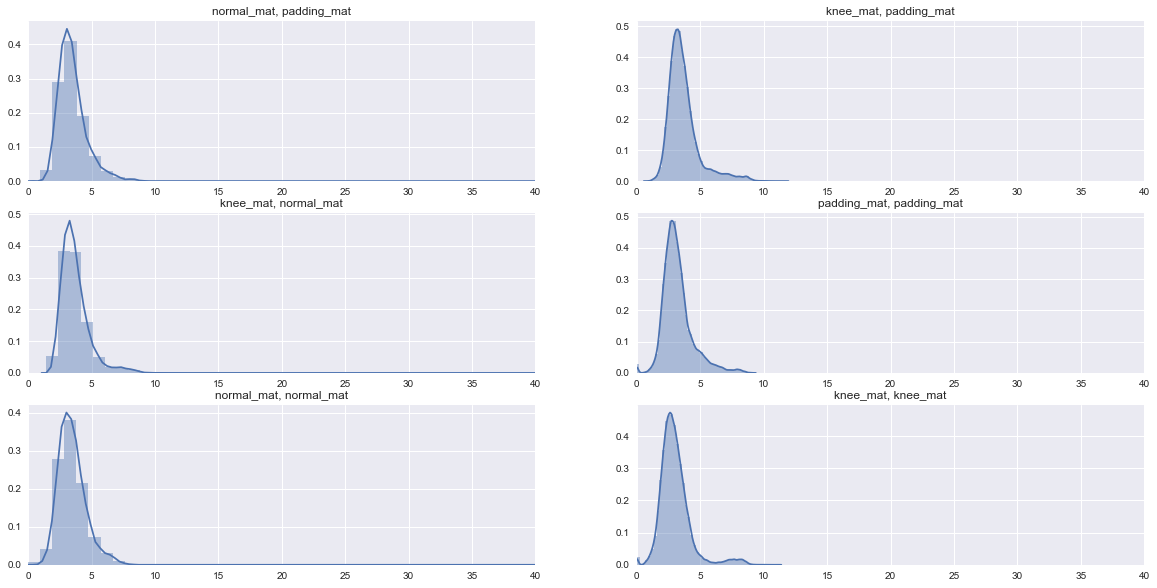

In [40]:
plt.figure(figsize=(20,10))
category = ['normal_mat, padding_mat', 'knee_mat, padding_mat', 'knee_mat, normal_mat',  'padding_mat, padding_mat', 'normal_mat, normal_mat', 'knee_mat, knee_mat' ]
for i in range(1, 7):
    plt.subplot(3, 2, i)
    lm= sns.distplot(eucl_dist.pop())
    lm.axes.set_xlim(0,40)
    plt.title(category[i-1])
    

In [41]:
# Riemmanian
riem_dist = [];
riem_dist.append(calculate_distance(knee_mat, knee_mat, dist='Riemmanian'))
riem_dist.append(calculate_distance(normal_mat, normal_mat, dist='Riemmanian'))
riem_dist.append(calculate_distance(padding_mat, padding_mat, dist='Riemmanian'))

riem_dist.append(calculate_distance(knee_mat, normal_mat, dist='Riemmanian'))
riem_dist.append(calculate_distance(knee_mat, padding_mat, dist='Riemmanian'))
riem_dist.append(calculate_distance(normal_mat, padding_mat, dist='Riemmanian'))

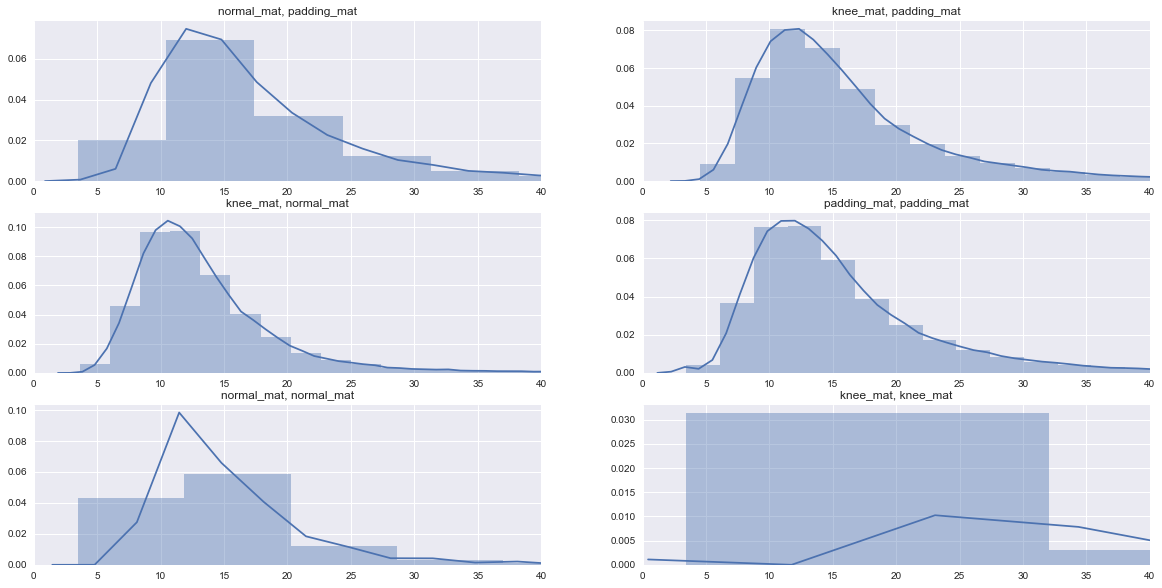

In [42]:
plt.figure(figsize=(20,10))
category = ['normal_mat, padding_mat', 'knee_mat, padding_mat', 'knee_mat, normal_mat',  'padding_mat, padding_mat', 'normal_mat, normal_mat', 'knee_mat, knee_mat' ]
for i in range(1, 7):
    plt.subplot(3, 2, i)
    lm= sns.distplot(riem_dist.pop())
    lm.axes.set_xlim(0,40)
    plt.title(category[i-1])
    

# KNN algorithm

In [43]:
# prepare the data 
from data_utils_modified import Selection_train_test # data division
from k_nearest_neighbor import KNearestNeighbor # K-NN things

In [44]:
# divide data for train and test (same person cannot be in the same dataset part)
X, persons, Y = reshape_back_to_matrices(cov_mat, 2)
persons_testing = np.array([1, 9, 15, 18, 20, 21]) # specify which persons can be used for test
X_train, Y_train, X_test, Y_test, persons_train = Selection_train_test(X, persons, Y, persons_testing)

C:\Users\margo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


(0, 12, 12)
Persons for train: 
[  2.   3.   4.   5.   6.   7.   8.  10.  11.  12.  13.  14.  16.  17.  19.
  22.]
Persons for test: 
[  1.   9.  15.  18.  20.  21.]


In [45]:
# my dataset shape
print(X.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(548, 12, 12)
(398, 12, 12)
(398,)
(150, 12, 12)
(150,)


In [46]:
classifier = KNearestNeighbor() # with Euclidean dist if not specified 
classifier.train(X_train, Y_train)

Euclidean


In [47]:
# some small tests to check if all works
dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)

(150, 398)


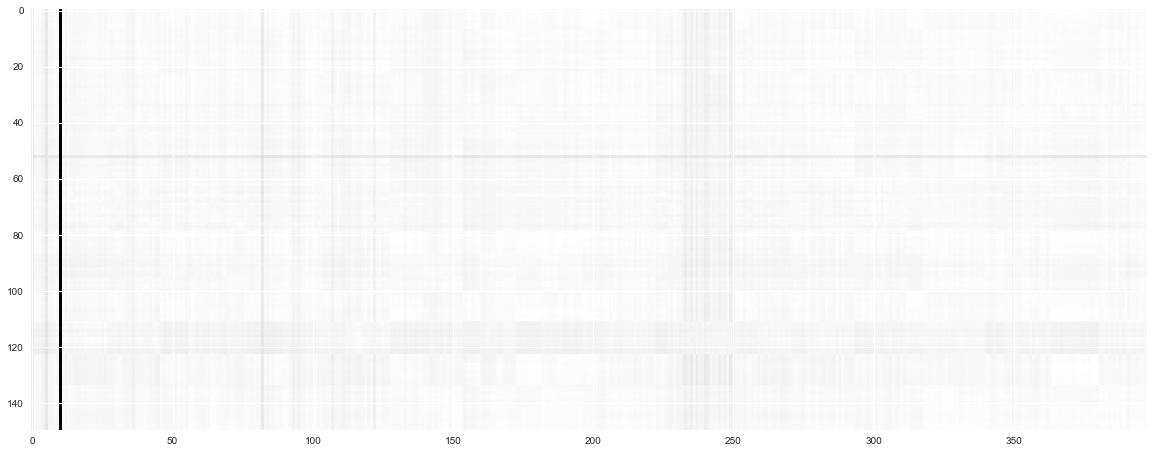

In [48]:
# Visualize the distance matrix: each row is a single test example and
# its distances to training examples
plt.figure(figsize=(20,10))
plt.imshow(dists, interpolation='none')
plt.show() # weird black line -> ???

In [49]:
num_test = np.size(Y_test)
y_test_pred = classifier.predict_labels(dists, k=3)
# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == Y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 100 / 150 correct => accuracy: 0.666667


In [ ]:
print(persons_train)
# have to give new labels to run the previous funtion
unique_persons =  np.unique(persons_train)
for i in range(0, len(unique_persons)):
    indexes = np.where(persons_train ==unique_persons[i])
    persons_train[indexes] = i+1
# modified ID labels            
print(persons_train)        

# CROSS-VALIDATION

In [51]:
# Here I am just esimating the best K based on validation data

classifier = KNearestNeighbor()
k_choices = [1, 3, 5, 8, 10, 12, 14, 16, 18, 20] #
persons_val = np.array([2,6,10,11,15])
X_train, Y_train, X_val, Y_val, _  = Selection_train_test(X_train,  persons_train, Y_train, persons_val) # substract val data
k_to_accuracies = {}
#for each possible k
for i in range(len(k_choices)): 
    # for each num_fold
        classifier.train(X_train, Y_train)
        dists = classifier.compute_distances_two_loops(X_val)
        y_test_pred = classifier.predict_labels(dists, k=k_choices[i])
        # Compute and print the fraction of correctly predicted examples
        num_correct = np.sum(y_test_pred == Y_val)
        num_test = np.size(Y_val)
        k_to_accuracies[k_choices[i]] = float(num_correct) / num_test
    

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

best_k = 1
acc = 0
# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    if k_to_accuracies[k] > acc:
        acc = k_to_accuracies[k]
        best_k = k
    print('k = %d, accuracy = %f' % (k, k_to_accuracies[k]))

Euclidean
(0, 12, 12)
Persons for train: 
[  1.   3.   4.   5.   7.   8.   9.  12.  13.  14.  16.]
Persons for test: 
[  2.   6.  10.  11.  15.]
k = 1, accuracy = 0.663793
k = 3, accuracy = 0.732759
k = 5, accuracy = 0.767241
k = 8, accuracy = 0.801724
k = 10, accuracy = 0.827586
k = 12, accuracy = 0.818966
k = 14, accuracy = 0.818966
k = 16, accuracy = 0.818966
k = 18, accuracy = 0.793103
k = 20, accuracy = 0.784483


In [52]:
y_test_pred = classifier.predict(X_test, k=best_k, num_loops=2)
# Compute and display the accuracy
num_correct = np.sum(y_test_pred == Y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy for my test set using Euclidean distance: %f and K = %d' % (num_correct, num_test, accuracy, best_k))

Got 105 / 116 correct => accuracy for my test set using Euclidean distance: 0.905172 and K = 10


# Riemannian Distance

In [53]:
classifier = KNearestNeighbor(dist_m='Riemmanian')
k_choices = [1, 3, 5, 8, 10, 12, 14, 16, 18, 20] #
#persons_val = np.array([2,6,10,11,15]) # same as previously
#X_train, Y_train, X_val, Y_val, _  = Selection_train_test(X_train,  persons_train, Y_train, persons_val) # substract val data
k_to_accuracies = {}
#for each possible k
for i in range(len(k_choices)): 
    # for each num_fold
        classifier.train(X_train, Y_train)
        dists = classifier.compute_distances_two_loops(X_val)
        y_test_pred = classifier.predict_labels(dists, k=k_choices[i])
        # Compute and print the fraction of correctly predicted examples
        num_correct = np.sum(y_test_pred == Y_val)
        num_test = np.size(Y_val)
        k_to_accuracies[k_choices[i]] = float(num_correct) / num_test
    

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

best_k = 1
acc = 0
# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    if k_to_accuracies[k] > acc:
        acc = k_to_accuracies[k]
        best_k = k
    print('k = %d, accuracy = %f' % (k, k_to_accuracies[k]))

Riemmanian
k = 1, accuracy = 0.517241
k = 3, accuracy = 0.439655
k = 5, accuracy = 0.439655
k = 8, accuracy = 0.405172
k = 10, accuracy = 0.431034
k = 12, accuracy = 0.474138
k = 14, accuracy = 0.405172
k = 16, accuracy = 0.413793
k = 18, accuracy = 0.396552
k = 20, accuracy = 0.413793


In [54]:
y_test_pred = classifier.predict(X_test, k=best_k, num_loops=2)
# Compute and display the accuracy
num_correct = np.sum(y_test_pred == Y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy for my test set using Riemmanian distance: %f and K = %d' % (num_correct, num_test, accuracy, best_k))

Got 52 / 116 correct => accuracy for my test set using Riemmanian distance: 0.448276 and K = 1
